In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas
import fiona
import rtree
import folium
from folium.plugins import HeatMap
df1 = pd.read_csv("comuna_1_dummies.csv",encoding="utf-8")
barrios = pd.read_csv("barrios.csv", encoding='latin1')


In [2]:
def from_wkt(df, wkt_column):
    import shapely.wkt
    df["coordinates"]= df[wkt_column].apply(shapely.wkt.loads)
    gdf = geopandas.GeoDataFrame(barrios, geometry='coordinates')
    return gdf

In [3]:
barrios = from_wkt(barrios, "WKT")

In [4]:
from shapely.geometry import Point
barrios.crs = {'init' :'epsg:4326'}

C:\Users\Alfredo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [5]:
def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df,
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf

In [6]:
df_heat=from_x_y(df1,"lon","lat")

In [7]:
df_heat_comuna=df_heat[["lat","lon","price_usd_per_m2"]]

In [8]:
heat_data_comuna = [[row['lat'],row['lon'],row["price_usd_per_m2"]] for index, row in df_heat_comuna.iterrows()]

In [9]:
#Veamos una imagen general de la distribucion de precios por m2
m = folium.Map([-34.606359, -58.371863], zoom_start=14, tiles="OpenStreetMap")
folium.GeoJson(barrios[(barrios["COMUNA"]==1)].to_json()).add_to(m)
HeatMap(heat_data_comuna, min_opacity=0.3,max_val=max(df_heat_comuna["price_usd_per_m2"]),radius=16, blur=15, max_zoom=1).add_to(m)
m

In [10]:
crimes = df1[["lon","lat","crimes"]]
crimes_Heat = [[row['lat'],row['lon'],row["crimes"]] for index, row in crimes.iterrows()]

In [11]:
#Mapa del Crimen
m = folium.Map([-34.606359, -58.371863], zoom_start=14, tiles="OpenStreetMap")
folium.GeoJson(barrios[(barrios["COMUNA"]==1)].to_json()).add_to(m)
HeatMap(crimes_Heat, min_opacity=0.3, max_val=max(df1["crimes"]),radius=13, blur=15, max_zoom=1).add_to(m)
m

In [12]:
df_corr = df1[['price_usd_per_m2','surface_total_in_m2','cochera','seguridad',
              'parrilla','pileta','gimnasio','acondicionado','terraza','lavadero','balcon',
              'crimes','dis_bancos','dis_clubes','dis_comisarias','dis_bomberos','dis_colegios',
              'dis_restaurants','dis_subtes','dis_gym','dis_hospitales','dis_universidades','colectivos','dis_espver']].corr()

<AxesSubplot:>

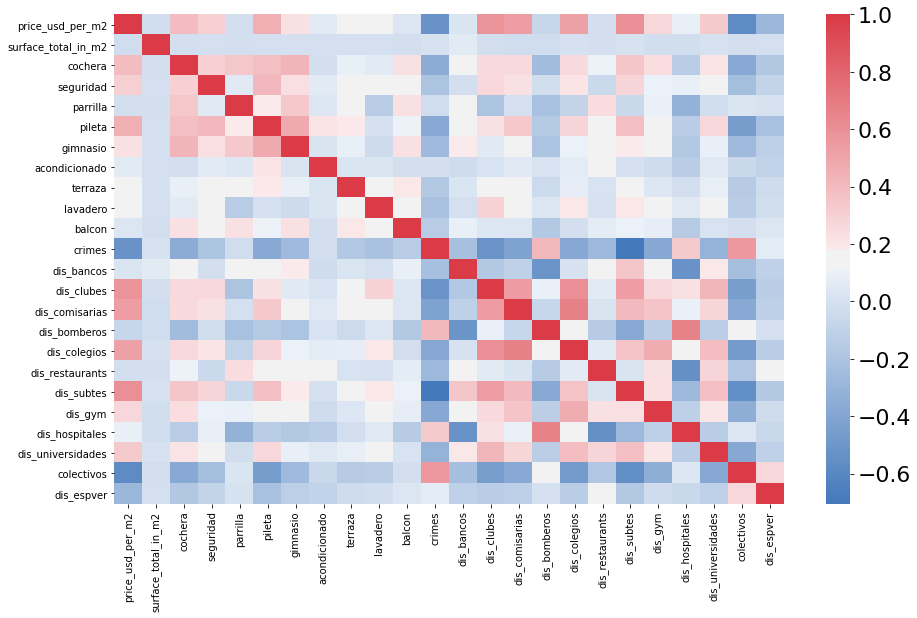

In [13]:
plt.subplots(figsize=(15, 9))
plt.rcParams.update({'font.size': 22})
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df_corr,cmap=cmap, 
        xticklabels=df_corr.columns,
        yticklabels=df_corr.columns)